In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
plt.rcParams['font.size'] = 14
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["lines.linewidth"] = 2

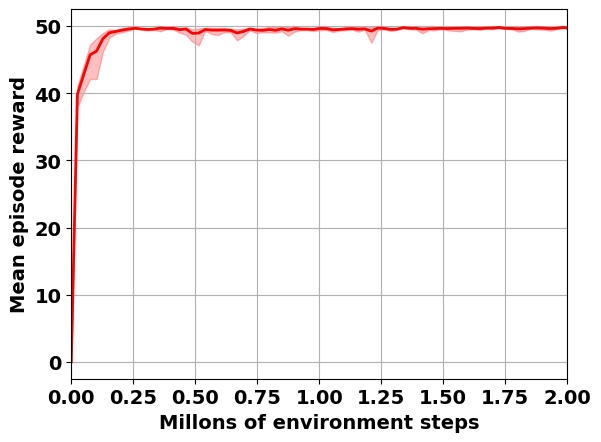

In [29]:
data_path = "/home/shane/onedrive/research/thesis_figures/tensorboard/"


# Get the axis showing number of environment steps (same for all metrics) 
df = pd.read_csv(
      data_path + f"run-lightning_logs_version_502-tag-train_total_step_count.csv")
step_axis = df["Value"][:200]

metric = "mean_episode_reward"
data = []
experiments = [549, 550, 551, 553, 556]
entropy_loss = np.array([])
for experiment in experiments:
  df = pd.read_csv(
      data_path + f"run-lightning_logs_version_{experiment}-tag-train_{metric}.csv")
  # data.append(pd.DataFrame([0]))
  data.append(df["Value"][:200])
  
# Process metrics
data = pd.concat(data, axis=1)
mean = data.mean(axis=1)
minvals = data.min(axis=1)
maxvals = data.max(axis=1)

# Plot the results
fig, ax = plt.subplots()
x = np.linspace(min(step_axis), max(step_axis), len(mean))
x = np.append([0], x)
mean = np.append([0], mean)
ax.plot(x/1e6, mean, color='red')
minvals = np.append([0], minvals)
maxvals = np.append([0], maxvals)
plt.fill_between(x/1e6, minvals, maxvals, color='red', alpha=0.25)
plt.xlabel('Millons of environment steps')
plt.ylabel('Mean episode reward')
plt.xlim(0, 2)
# plt.ylim(0, 6)
plt.grid()

In [30]:
fig.savefig(data_path + f"{metric}.pdf",bbox_inches='tight')